# Import Libraries

In [1]:
import pandas as pd
import numpy as np

# Read data and display first few results

In [2]:
df = pd.read_csv("Telecom Customer churn Dataset.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Understand Data

In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Preprocessing

In [5]:
df = df.drop(columns=['customerID'])

In [6]:
#Check for null values
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# Check for Duplicates in the dataset
df.duplicated().sum()

22

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df = df.reset_index(drop = True)

In [10]:
df.duplicated().sum()

0

In [11]:
# Change data type of total charges col
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [12]:
df['TotalCharges'].dtype

dtype('float64')

In [13]:
# Display rows with NaN in 'TotalCharges' to understand the issue
print(df[df['TotalCharges'].isnull()])

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1081    Male              0     Yes        Yes       0          Yes   
1338  Female              0     Yes        Yes       0           No   
3323    Male              0     Yes        Yes       0          Yes   
3817    Male              0     Yes        Yes       0          Yes   
4370  Female              0     Yes        Yes       0          Yes   
5207    Male              0     Yes        Yes       0          Yes   
6652  Female              0     Yes        Yes       0          Yes   
6735    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 N

In [14]:
# remove missing values from Total_charges
df.dropna(subset="TotalCharges",inplace=True)

In [15]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Statistical Summary of the data

In [16]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000,7010.000000
mean,0.162767,32.520399,64.888666,2290.353388
std,0.369180,24.520441,30.064769,2266.820832
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,408.312500
50%,0.000000,29.000000,70.400000,1403.875000
75%,0.000000,56.000000,89.900000,3807.837500
max,1.000000,72.000000,118.750000,8684.800000


# Exploratory Data Analysis (EDA)
    # Analyze the distribution of key variables
    

In [18]:
# Import library

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

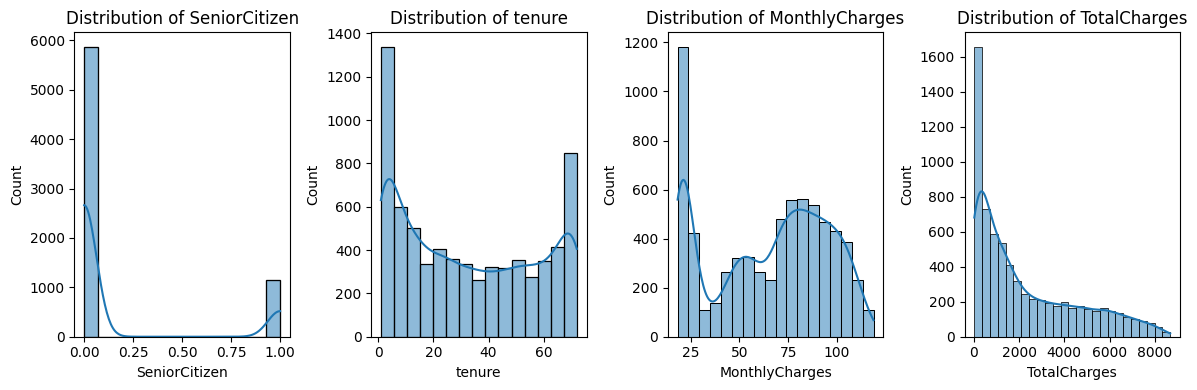

In [19]:
# Distribution analysis

columns = ['SeniorCitizen','tenure','MonthlyCharges', 'TotalCharges']

plt.figure(figsize = (12,4))


for i,column in enumerate(columns):
    plt.subplot(1, 4, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


### Normalizing SeniorCitizen, tenure, MonthlyCharges and TotalCharges

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardizing TotalCharges
standard_scaler = StandardScaler()
df['TotalCharges'] = standard_scaler.fit_transform(df[[ 'TotalCharges']])

# Normalizing charges
min_max_scaler = MinMaxScaler()
df[['SeniorCitizen', 'tenure', 'MonthlyCharges']] = min_max_scaler.fit_transform(df[['SeniorCitizen', 'tenure', 'MonthlyCharges']])

# Display the first few rows of the modified dataset
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0.0,Yes,No,0.000000,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0.115423,-0.997284,No
1,Male,0.0,No,No,0.464789,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0.385075,-0.176848,No
2,Male,0.0,No,No,0.014085,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0.354229,-0.962740,Yes
3,Male,0.0,No,No,0.619718,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0.239303,-0.198355,No
4,Female,0.0,No,No,0.014085,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.521891,-0.943549,Yes


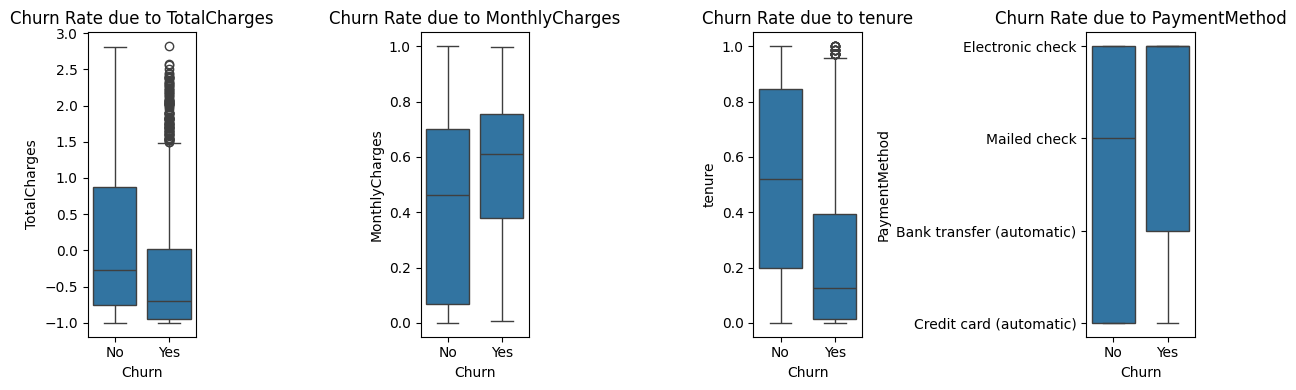

In [22]:
# Checking for outliers

columns = ['TotalCharges','MonthlyCharges','tenure','PaymentMethod']

plt.figure(figsize = (12,4))

for i,column in enumerate(columns):
    plt.subplot(1, 4, i+1)
    sns.boxplot(x='Churn', y=df[column], data=df)
    plt.title(f'Churn Rate due to {column}')

plt.tight_layout()
plt.show()

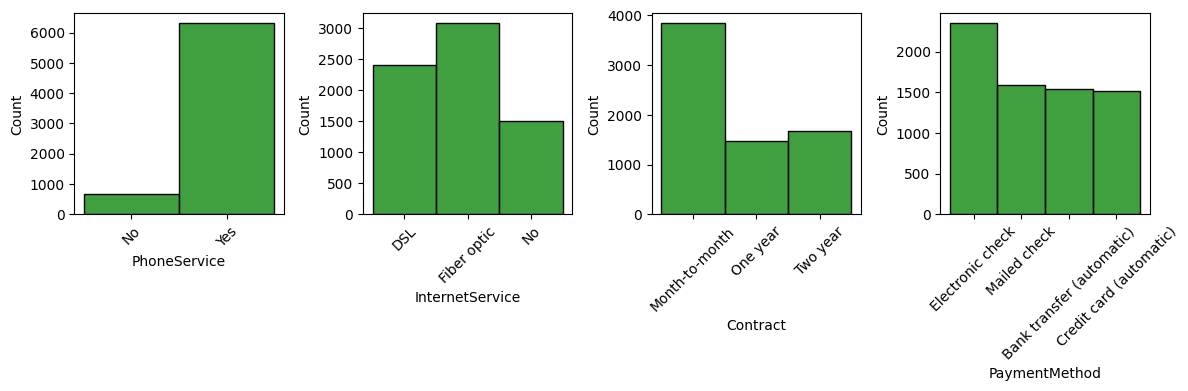

In [23]:
# Checking for Category wise distribution

columns = ['PhoneService','InternetService','Contract','PaymentMethod']

plt.figure(figsize=(12,4))
           
for i,column in enumerate(columns):
    plt.subplot(1,4,i+1)
    sns.histplot(df[column], color = 'Green')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

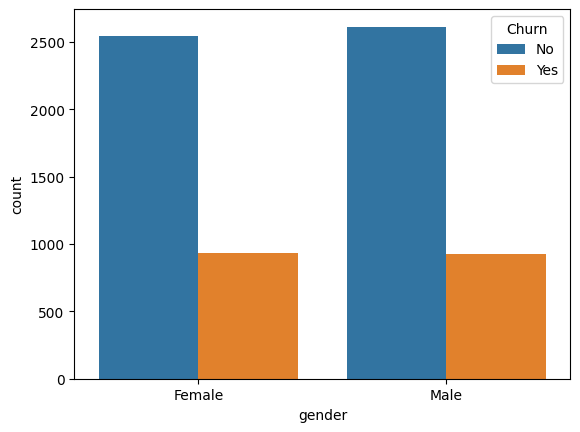

In [24]:
# Categorical relationship with churn
sns.countplot(x='gender', hue='Churn', data=df)
plt.show()

## Encoding 

In [25]:
from sklearn.preprocessing import OneHotEncoder

Encoded_data = pd.get_dummies(df, columns = [
    'gender', 
    'InternetService', 
    'PhoneService',
    'Contract', 
    'Partner',	
    'Dependents', 
    'PaperlessBilling',
    'PaymentMethod',
    'MultipleLines',	
    'OnlineSecurity',	
    'OnlineBackup',	
    'DeviceProtection',
    'TechSupport',
    'StreamingTV', 
    'StreamingMovies'], dtype=int) 
Encoded_data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,0.0,0.000000,0.115423,-0.997284,No,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0.0,0.464789,0.385075,-0.176848,No,0,1,1,0,0,...,1,1,0,0,1,0,0,1,0,0
2,0.0,0.014085,0.354229,-0.962740,Yes,0,1,1,0,0,...,0,1,0,0,1,0,0,1,0,0
3,0.0,0.619718,0.239303,-0.198355,No,0,1,1,0,0,...,1,0,0,1,1,0,0,1,0,0
4,0.0,0.014085,0.521891,-0.943549,Yes,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Encoded_data['encoded_Churn'] = label_encoder.fit_transform(Encoded_data['Churn'])

In [27]:
Encoded_data.drop(columns=['Churn'],inplace=True)

In [28]:
Encoded_data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PhoneService_No,...,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,encoded_Churn
0,0.0,0.000000,0.115423,-0.997284,1,0,1,0,0,1,...,1,0,0,1,0,0,1,0,0,0
1,0.0,0.464789,0.385075,-0.176848,0,1,1,0,0,0,...,1,0,0,1,0,0,1,0,0,0
2,0.0,0.014085,0.354229,-0.962740,0,1,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
3,0.0,0.619718,0.239303,-0.198355,0,1,1,0,0,1,...,0,0,1,1,0,0,1,0,0,0
4,0.0,0.014085,0.521891,-0.943549,1,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1


In [29]:
numeric_columns = Encoded_data.select_dtypes(include='number')
numeric_columns.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PhoneService_No,...,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,encoded_Churn
0,0.0,0.000000,0.115423,-0.997284,1,0,1,0,0,1,...,1,0,0,1,0,0,1,0,0,0
1,0.0,0.464789,0.385075,-0.176848,0,1,1,0,0,0,...,1,0,0,1,0,0,1,0,0,0
2,0.0,0.014085,0.354229,-0.962740,0,1,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
3,0.0,0.619718,0.239303,-0.198355,0,1,1,0,0,1,...,0,0,1,1,0,0,1,0,0,0
4,0.0,0.014085,0.521891,-0.943549,1,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1


In [30]:
correlation_matrix = numeric_columns.corr()
correlation_matrix 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PhoneService_No,...,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,encoded_Churn
SeniorCitizen,1.000000,0.014456,0.219131,0.101642,0.001069,-0.001069,-0.108914,0.254556,-0.181713,-0.008724,...,0.204958,-0.181713,-0.061293,0.048195,-0.181713,0.104830,0.033703,-0.181713,0.119247,0.151270
tenure,0.014456,1.000000,0.244194,0.825293,-0.006370,0.006370,0.011691,0.016640,-0.033641,-0.009217,...,-0.266509,-0.033641,0.323761,-0.248123,-0.033641,0.278077,-0.254192,-0.033641,0.283212,-0.353339
MonthlyCharges,0.219131,0.244194,1.000000,0.650540,0.012361,-0.012361,-0.163695,0.787169,-0.762181,-0.249625,...,0.319612,-0.762181,0.337361,0.013709,-0.762181,0.629336,0.014990,-0.762181,0.626885,0.194008
TotalCharges,0.101642,0.825293,0.650540,1.000000,-0.000879,0.000879,-0.053986,0.360768,-0.373655,-0.114222,...,-0.085372,-0.373655,0.431822,-0.198006,-0.373655,0.514548,-0.203459,-0.373655,0.518704,-0.198362
gender_Female,0.001069,-0.006370,0.012361,-0.000879,1.000000,-1.000000,-0.007607,0.009898,-0.003164,-0.007799,...,-0.004666,-0.003164,0.007996,-0.003794,-0.003164,0.006488,-0.006788,-0.003164,0.009471,0.008694
gender_Male,-0.001069,0.006370,-0.012361,0.000879,-1.000000,1.000000,0.007607,-0.009898,0.003164,0.007799,...,0.004666,0.003164,-0.007996,0.003794,0.003164,-0.006488,0.006788,0.003164,-0.009471,-0.008694
InternetService_DSL,-0.108914,0.011691,-0.163695,-0.053986,-0.007607,0.007607,1.000000,-0.643450,-0.379098,0.452245,...,0.028294,-0.379098,0.311633,0.304280,-0.379098,0.013681,0.294143,-0.379098,0.024342,-0.124152
InternetService_Fiber optic,0.254556,0.016640,0.787169,0.360768,0.009898,-0.009898,-0.643450,1.000000,-0.464418,-0.290997,...,0.400604,-0.464418,-0.021020,0.061783,-0.464418,0.329704,0.068554,-0.464418,0.322398,0.307612
InternetService_No,-0.181713,-0.033641,-0.762181,-0.373655,-0.003164,0.003164,-0.379098,-0.464418,1.000000,-0.171445,...,-0.517003,1.000000,-0.335128,-0.426717,1.000000,-0.414390,-0.423174,1.000000,-0.417891,-0.228220
PhoneService_No,-0.008724,-0.009217,-0.249625,-0.114222,-0.007799,0.007799,0.452245,-0.290997,-0.171445,1.000000,...,0.054929,-0.171445,0.094559,0.123292,-0.171445,0.020595,0.111394,-0.171445,0.032697,-0.011072


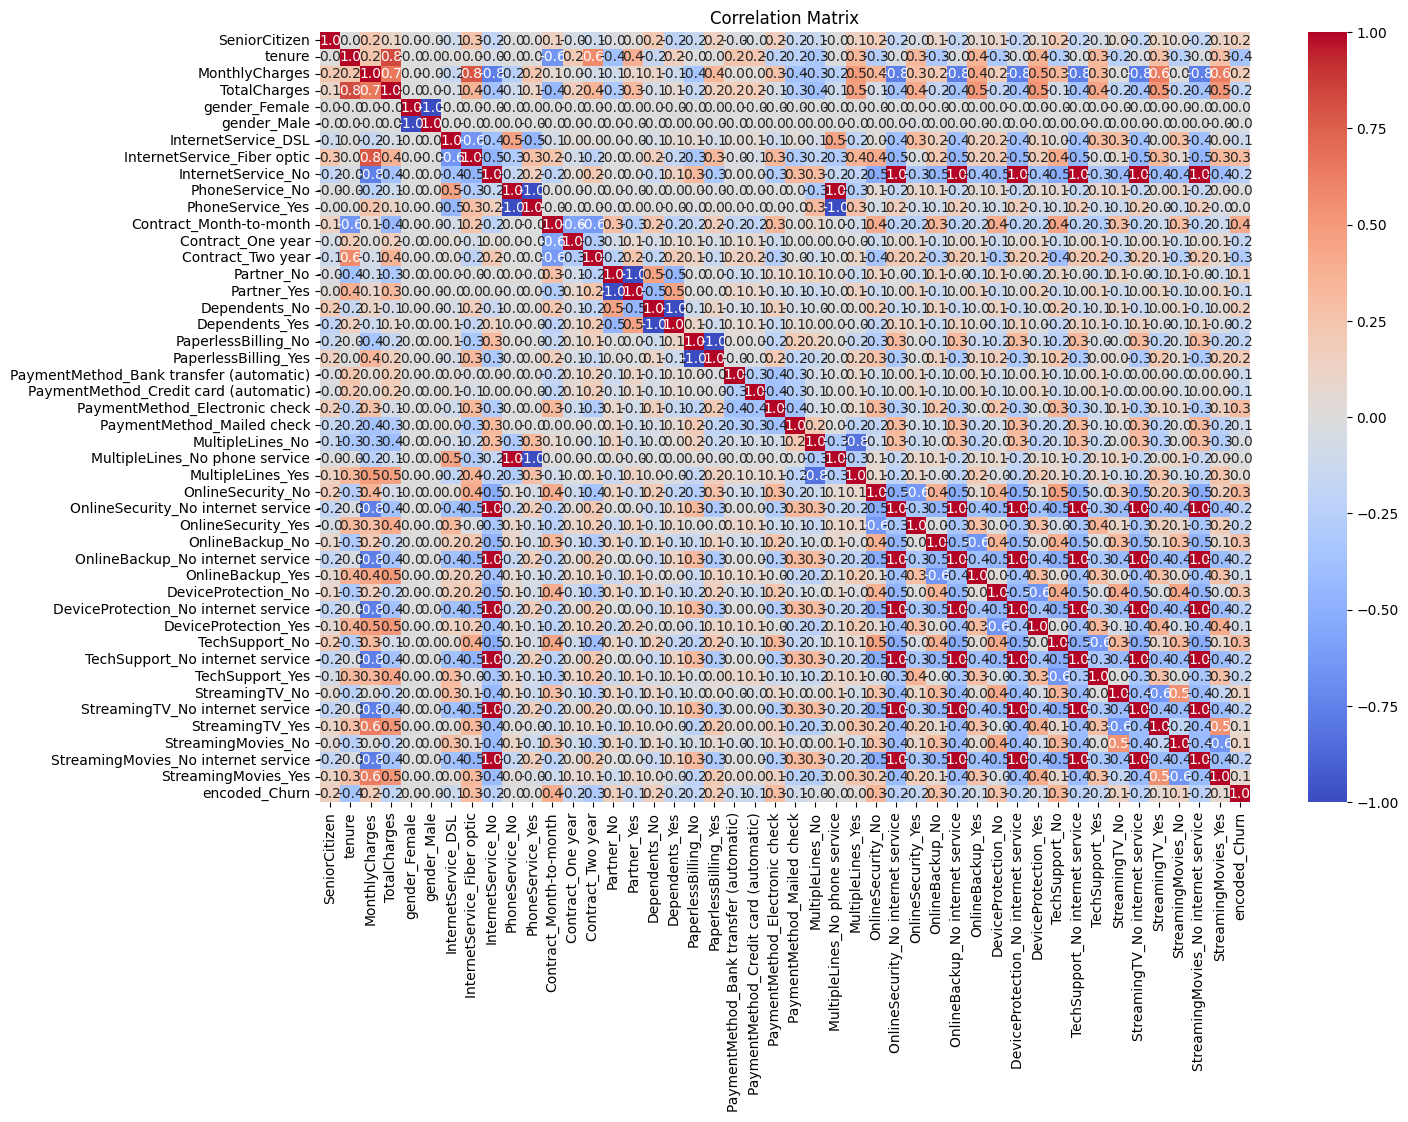

In [31]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Correlation Matrix")
plt.show()

# Feature Selection

In [32]:
X = Encoded_data.drop('encoded_Churn', axis=1)
y = Encoded_data['encoded_Churn']

# Predictive Modelling

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
print(classification_report(y_test, log_pred))
print('ROC AUC:', roc_auc_score(y_test, log_model.predict_proba(X_test)[:,1]))

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print(classification_report(y_test, rf_pred))
print('ROC AUC:', roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]))


              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1081
           1       0.63      0.58      0.60       321

    accuracy                           0.82      1402
   macro avg       0.75      0.74      0.74      1402
weighted avg       0.82      0.82      0.82      1402

ROC AUC: 0.8520263630364178
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1081
           1       0.56      0.48      0.52       321

    accuracy                           0.79      1402
   macro avg       0.70      0.68      0.69      1402
weighted avg       0.78      0.79      0.79      1402

ROC AUC: 0.8205149264699526


# Model Tuning

In [34]:
from sklearn.model_selection import GridSearchCV

# Example: Tuning Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
best_rf_pred = best_rf_model.predict(X_test)
print(classification_report(y_test, best_rf_pred))
print('Best ROC AUC:', roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:,1]))


              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1081
           1       0.64      0.53      0.58       321

    accuracy                           0.82      1402
   macro avg       0.75      0.72      0.73      1402
weighted avg       0.81      0.82      0.82      1402

Best ROC AUC: 0.8473318520695906


# Conclusion

In [49]:
# Feature importance from Random Forest

features = [X.columns]
importances = best_rf_model.feature_importances_
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)

print(feature_importance)

tenure                                     0.134300
TotalCharges                               0.124002
Contract_Month-to-month                    0.114224
MonthlyCharges                             0.082269
OnlineSecurity_No                          0.053108
TechSupport_No                             0.045618
PaymentMethod_Electronic check             0.041096
InternetService_Fiber optic                0.039183
Contract_Two year                          0.035200
InternetService_DSL                        0.020670
OnlineBackup_No                            0.019380
DeviceProtection_No                        0.017771
Contract_One year                          0.017295
OnlineSecurity_Yes                         0.016407
TechSupport_Yes                            0.013573
PaperlessBilling_Yes                       0.013086
SeniorCitizen                              0.012924
PaperlessBilling_No                        0.012699
Dependents_Yes                             0.009701
MultipleLine

# Top Important Features:
    1.  Tenure (0.1343): This is the most important feature. It indicates the number of months a customer has stayed with the company. A higher tenure typically suggests lower likelihood of churn, as loyal customers are less likely to leave.
    
    2.  TotalCharges (0.1240): The total amount charged to the customer. Customers with higher total charges might be less likely to churn, as they have invested more in the services.
    
    3. Contract_Month-to-month (0.1142): Customers on month-to-month contracts are more likely to churn compared to those on longer contracts (e.g., one year or two years), as they have more flexibility to leave.
    
    4.  MonthlyCharges (0.0823): The amount charged to the customer monthly. Higher monthly charges might increase the likelihood of churn if customers feel they are not getting value for money.
    

# Other Significant Features:
    1. OnlineSecurity_No (0.0531): Customers without online security are more likely to churn, possibly due to dissatisfaction with the lack of security features.
    
    2. TechSupport_No (0.0456): Lack of tech support correlates with higher churn, indicating the importance of support services in retaining customers.
    
    3. PaymentMethod_Electronic check (0.0411): Customers paying by electronic check show higher churn rates, which could be linked to customer demographics or preferences.
    
    4. InternetService_Fiber optic (0.0392): Type of internet service affects churn. Customers with fiber optic services might have different satisfaction levels compared to those with DSL or no internet service.

# Contract Terms and Billing:
    1. Contract_Two year (0.0352): Longer contracts correlate with lower churn rates, as they commit customers for a longer period.
    
    2. InternetService_DSL (0.0207): Type of internet service again playing a role, with DSL customers showing different churn patterns compared to fiber optic or no internet.
    
    3. PaperlessBilling_Yes (0.0131): Paperless billing might have a slight impact on churn, reflecting customer preferences for digital vs. paper billing.

# Demographic and Other Factors:
    1. SeniorCitizen (0.0129): Senior citizens may have different churn behaviors, possibly due to their specific service needs or satisfaction levels.
    
    2. Dependents_Yes (0.0097): Having dependents might influence churn, potentially indicating family plans or multiple service users.
    
    3. Gender (0.0088 for Female, 0.0080 for Male): Gender shows a smaller impact, but it might still contribute to understanding customer profiles.

# Less Important Features:
Features like 
    1. PhoneService
    2. StreamingTV
    3. DeviceProtection
    4. MultipleLines
etc. have lower importance scores. 
While they contribute to the model, their impact on predicting churn is less significant compared to the top features.

# Actionable Insights:
    1. Retention Strategies for Month-to-Month Customers: Focus on providing incentives for customers on month-to-month contracts to switch to longer-term contracts.
    
    2. Enhance Support Services: Improving online security and tech support services can reduce churn.
    
    3. Pricing Strategies: Consider the impact of monthly and total charges on churn. Offering personalized pricing plans or discounts could help retain customers.
    
    4. Payment Method Insights: Understanding why customers paying by electronic check are more likely to churn could help in designing better payment experience or incentives for other methods.

# Visualization of Feature Importance:

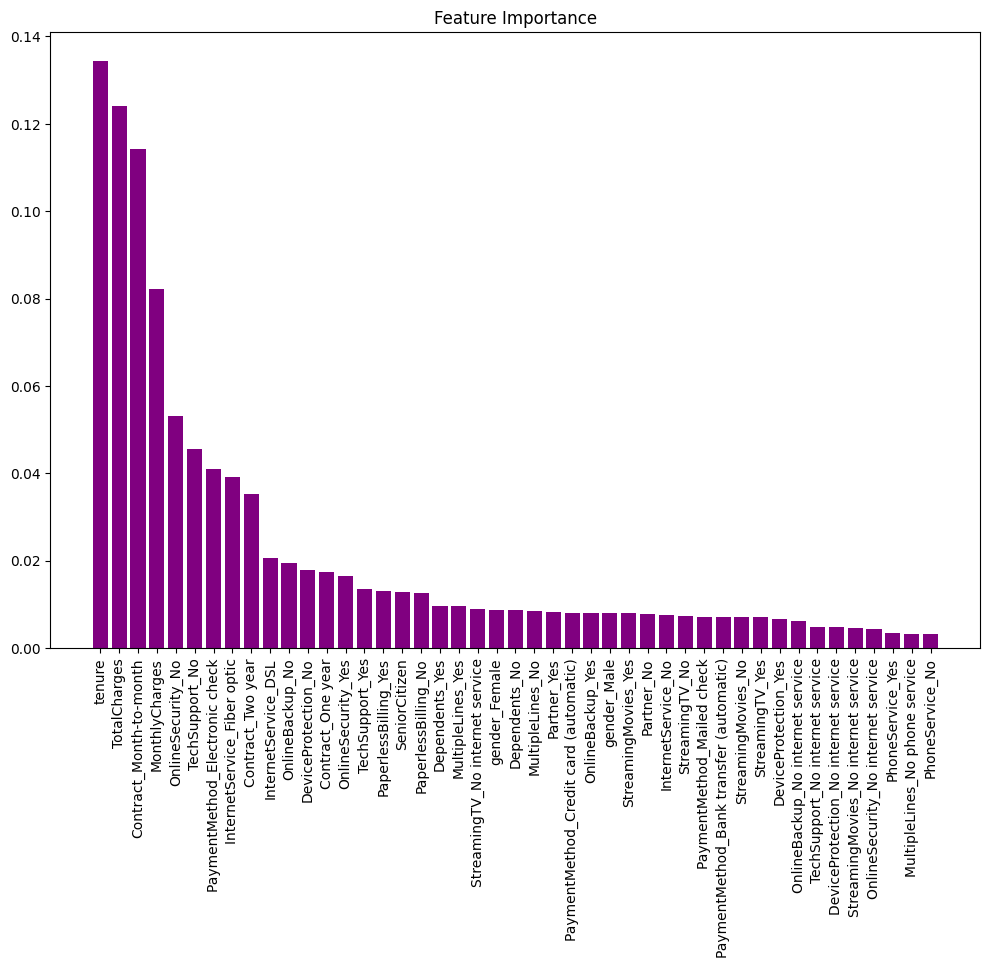

In [54]:

# Plot feature importances
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

plt.figure(figsize=(12, 8))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], color = 'Purple')
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.show()
